In [4]:
!pip install selenium
!apt-get update
!apt-get install -y chromium-chromedriver
!pip install selenium
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install webdriver_manager

!pip install chromedriver_autoinstaller


from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
import time
import pandas as pd
import re
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.chrome.options import Options as ChromeOptions

from webdriver_manager.chrome import ChromeDriverManager
import time
import chromedriver_autoinstaller

def initialize_driver():
    options = Options()  # ChromeOptions 인스턴스 생성
    user_agent = "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36"
    options.add_argument('user-agent=' + user_agent)  # 사용자 에이전트 설정
    options.add_argument("lang=ko_KR")  # 언어 설정
    options.add_argument('headless')  # Headless 모드 설정
    options.add_argument('window-size=1920x1080')  # 창 크기 설정
    options.add_argument("disable-gpu")  # GPU 비활성화
    options.add_argument("--no-sandbox")  # 권한 문제 방지

    # Chromedriver 초기화
    driver = webdriver.Chrome(options=options)
    return driver




# 멜론 차트 데이터를 수집하는 함수
def melon_collector(driver, url, year):
    time.sleep(5)  # 페이지 로드 대기
    driver.get(url)
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    # 제목 가져오기
    title = driver.find_elements(by=By.CLASS_NAME, value='ellipsis.rank01')  # 제목
    title_list = [t.text for t in title][:50]  # Top 50만 추출

    # 가수 가져오기
    singer = driver.find_elements(by=By.CLASS_NAME, value='ellipsis.rank02')  # 가수
    singer_list = [s.text for s in singer][:50]  # Top 50만 추출

    # 곡 ID 가져오기
    song_info = soup.find_all('div', attrs={'class': 'ellipsis rank01'})
    song_ids = []

    for i in range(50):
        try:
            # 곡 ID 추출 후 앞 8자리 제거
            raw_song_id = re.sub(r'[^0-9]', '', song_info[i].find("a")["href"][4:])
            song_id = raw_song_id[8:]  # 앞 8자리 제거
            song_ids.append(song_id)
            print(f"곡 ID 추출 성공: {song_id}")  # 곡 ID 출력
        except Exception as e:
            song_ids.append('')
            print(f"곡 ID 추출 실패 at index {i}: {e}")  # 에러 출력
            continue

    # 가사 가져오기
    lyrics = []
    for song_id in song_ids:
        if not song_id:  # song_id가 비어있는 경우
            lyrics.append('')
            continue
        try:
            driver.get(f"https://www.melon.com/song/detail.htm?songId={song_id}")
            time.sleep(2)
            lyric = driver.find_element(by=By.CLASS_NAME, value="lyric")
            lyrics.append(lyric.text.replace("\n", " "))  # 줄바꿈을 공백으로
        except:
            lyrics.append('')  # 가사가 없는 경우
            continue

    # 데이터 프레임 생성
    df = pd.DataFrame({
        "제목": title_list,
        "가수": singer_list,
        "가사": lyrics,
        "연도": year
    })

    return df

# 연도별 데이터 크롤링
start_year = 1990
end_year = 2023
url_template = 'https://www.melon.com/chart/age/index.htm?chartType=YE&chartGenre=KPOP&chartDate='

melon_total = []  # 모든 연도의 데이터를 저장할 리스트

# WebDriver 초기화
driver = initialize_driver()

while start_year <= end_year:
    url = url_template + str(start_year)
    try:
        yearly_data = melon_collector(driver, url, start_year)
        melon_total.append(yearly_data)
        print(f"{start_year}년 데이터 수집 완료")
    except Exception as e:
        print(f"{start_year}년 데이터 수집 중 오류 발생: {e}")
    start_year += 1

# WebDriver 종료
driver.quit()

# 모든 데이터를 하나의 데이터프레임으로 병합
if melon_total:
    combined_data = pd.concat(melon_total, ignore_index=True)

    # Top10 여부 확인 컬럼 추가
    combined_data["Top10"] = combined_data.index % 50 < 10  # Top 10인지 여부 (True/False)

    # 최종 데이터 확인 및 저장
    combined_data.to_csv("통합_데이터.csv", index=False, encoding="utf-8-sig")
    print("모든 데이터 수집 및 저장 완료")
else:
    print("데이터가 수집되지 않았습니다.")

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [3]:
import pandas as pd

# CSV 파일 경로를 지정하세요.
file_path = '통합_데이터.csv'

# CSV 파일 읽기
data = pd.read_csv(file_path)

# 데이터 출력
print(data)


                                       제목           가수  \
0                               LOVE DIVE    IVE (아이브)   
1                                  TOMBOY      (여자)아이들   
2                                    취중고백          김민석   
3                                  사랑인가 봐         멜로망스   
4                               사랑은 늘 도망가          임영웅   
..                                    ...          ...   
95                                  그라데이션         10CM   
96                                내가 아니라도           주호   
97                                 후라이의 꿈    AKMU (악뮤)   
98                                  Cupid  FIFTY FIFTY   
99  모든 날, 모든 순간 (Every day, Every Moment)           폴킴   

                                                   가사    연도  Top10  
0   네가 참 궁금해 그건 너도 마찬가지 이거면 충분해 쫓고 쫓는 이런 놀이 참을 수 없...  2022   True  
1   Look at you 넌 못 감당해 날 Ya took off hook 기분은 Cok...  2022   True  
2   뭐하고 있었니 늦었지만 잠시 나올래 너의 집 골목에 있는 놀이터에 앉아 있어 친구들...  2022   True  
3   너와 함께 하고 싶은 일들을 상상하는 게 

In [6]:
!pip install konlpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.8/493.8 kB 9.8 MB/s eta 0:00:00


In [7]:
import pandas as pd
from konlpy.tag import Komoran

# 수집된 데이터를 불러옵니다
# "sss.csv" 파일이 존재한다고 가정합니다.
data_path = "통합_데이터.csv"
melon_data = pd.read_csv(data_path, encoding="utf-8-sig")

# Top10 여부를 판단하여 'Top10' 컬럼 생성
melon_data["Top10"] = melon_data.groupby("연도").cumcount() < 10  # 각 연도별 Top 10 판단
melon_data["Top10"] = melon_data["Top10"].astype(int)  # True/False를 1/0으로 변환

# 연대별 데이터 분리
melon_1990s = melon_data[melon_data["연도"].between(1990, 1999)]
melon_2000s = melon_data[melon_data["연도"].between(2000, 2009)]
melon_2010s = melon_data[melon_data["연도"].between(2010, 2019)]
melon_2020s = melon_data[melon_data["연도"].between(2020, 2023)]

# 각 연대의 가사 데이터 추출
gasa_1990s = melon_1990s["가사"].dropna()
gasa_2000s = melon_2000s["가사"].dropna()
gasa_2010s = melon_2010s["가사"].dropna()
gasa_2020s = melon_2020s["가사"].dropna()

# Komoran을 사용하여 명사 추출
komoran = Komoran()

def extract_nouns(gasa_series):
    """가사 데이터에서 명사를 추출하여 리스트로 반환"""
    nouns = []
    for gasa in gasa_series:
        try:
            nouns.append(komoran.nouns(gasa))
        except:
            continue
    return nouns

# 연대별 명사 추출
noun_1990s = extract_nouns(gasa_1990s)
noun_2000s = extract_nouns(gasa_2000s)
noun_2010s = extract_nouns(gasa_2010s)
noun_2020s = extract_nouns(gasa_2020s)

# 연대별 데이터프레임으로 변환 (명사 리스트를 문자열로 저장)
df_1990s = pd.DataFrame({"연대": "1990s", "명사": [" ".join(n) for n in noun_1990s]})
df_2000s = pd.DataFrame({"연대": "2000s", "명사": [" ".join(n) for n in noun_2000s]})
df_2010s = pd.DataFrame({"연대": "2010s", "명사": [" ".join(n) for n in noun_2010s]})
df_2020s = pd.DataFrame({"연대": "2020s", "명사": [" ".join(n) for n in noun_2020s]})

# 모든 데이터를 하나로 합치기
final_data = pd.concat([df_1990s, df_2000s, df_2010s, df_2020s], ignore_index=True)

# CSV 파일로 저장
final_data.to_csv("명사_추출_데이터.csv", index=False, encoding="utf-8-sig")
print("명사 추출 완료 및 저장 완료!")


명사 추출 완료 및 저장 완료!


In [8]:
import pandas as pd

# CSV 파일 경로를 지정하세요.
file_path = '명사_추출_데이터.csv'

# CSV 파일 읽기
data = pd.read_csv(file_path)

# 데이터 출력
print(data)


         연대                                                 명사
0     1990s  청바지 여자 밥 배 여자 얘기 재미 여자 여자 머리 무스 윤기 여자 고요한 눈빛 시...
1     1990s  생각 대답 너에게 얘기 표정 집 앞 골목길 외등 외로움 끝 거 이별 온몸 사랑 뿐 ...
2     1990s  낮 저녁 유리창 이슬 밤 시계 소리 마음 밤 빗줄기 맘 비 시간 속 헤메 맘 비 이...
3     1990s  빗방울 거리 서서 숨소리 듯 붓 거리 투명 색칠 음악 카페 물감 빗방울 가로등 불 ...
4     1990s  모습 무대 뒤 소녀 눈물 무대 뒤 소녀 의자 손 바라 얘기 소녀 노래 소녀 울음 밖...
...     ...                                                ...
1668  2020s  밤 잠 글 기분 생각 번 옷 잉크 수 만큼 색감 조금 정신 때 수 마음 내일 말 요...
1669  2020s  사랑 별거 하루 빛 단 사람 그때 행복 것 행복 사람 곁 생각 적 이제 것 사랑 시...
1670  2020s  거위 벽 하늘 날 달팽이 바다 끝 꿈 꿈 남 꿈 강요 이건 길 꿈 곳 때 물결 날 ...
1671  2020s       불 주위 눈 속 말 꿈길 눈 지금 상상 꿈속 연습 포기 원 꿈속 밤 번 척 기회
1672  2020s  수 생각 눈물 시간 날 사람 이제 테 하루 유일한 휴식처 하나로 말 눈빛 송이 꽃 ...

[1673 rows x 2 columns]


In [27]:
# 불용어 파일 로드
stopword_path = "stopword.txt"  # 불용어가 저장된 파일 경로
with open(stopword_path, 'r', encoding='utf-8') as f:
    stopwords = f.read().split()  # 불용어를 리스트로 변환

# 불용어 처리된 명사를 저장할 리스트 초기화
noun_1990s_sw = []
noun_2000s_sw = []
noun_2010s_sw = []
noun_2020s_sw = []

# 불용어 처리 함수
def remove_stopwords(noun_list, stopwords):
    """명사 리스트에서 불용어를 제거"""
    result = []
    for text in noun_list:  # 명사 리스트에서 각 텍스트를 순회
        temp = [word for word in text if word not in stopwords]  # 불용어 제거
        result.append(temp)
    return result

# 연대별 불용어 처리
noun_1990s_sw = remove_stopwords(noun_1990s, stopwords)
noun_2000s_sw = remove_stopwords(noun_2000s, stopwords)
noun_2010s_sw = remove_stopwords(noun_2010s, stopwords)
noun_2020s_sw = remove_stopwords(noun_2020s, stopwords)

# 처리 결과 확인 (필요 시)
print("1990s 처리 완료:", noun_1990s_sw[:5])  # 일부만 출력
print("2000s 처리 완료:", noun_2000s_sw[:5])
print("2010s 처리 완료:", noun_2010s_sw[:5])
print("2020s 처리 완료:", noun_2020s_sw[:5])

# 불용어 제거된 데이터를 데이터프레임으로 변환 (선택적으로 저장 가능)
df_1990s_sw = pd.DataFrame({"연대": "1990s", "명사": [" ".join(n) for n in noun_1990s_sw]})
df_2000s_sw = pd.DataFrame({"연대": "2000s", "명사": [" ".join(n) for n in noun_2000s_sw]})
df_2010s_sw = pd.DataFrame({"연대": "2010s", "명사": [" ".join(n) for n in noun_2010s_sw]})
df_2020s_sw = pd.DataFrame({"연대": "2020s", "명사": [" ".join(n) for n in noun_2020s_sw]})

# 불용어 제거 후 데이터 병합
final_data_sw = pd.concat([df_1990s_sw, df_2000s_sw, df_2010s_sw, df_2020s_sw], ignore_index=True)

# CSV 파일로 저장
final_data_sw.to_csv("불용어_처리_데이터.csv", index=False, encoding="utf-8-sig")
print("불용어 처리 완료 및 저장 완료!")


1990s 처리 완료: [['청바지', '여자', '밥', '배', '여자', '얘기', '재미', '여자', '여자', '머리', '무스', '윤기', '여자', '고요한', '눈빛', '시력', '여자', '김치', '볶음밥', '여자', '목젖', '여자', '돈', '마음', '여자', '멋', '멋', '여자', '껌', '소리', '안나', '여자', '다리', '예뻐서', '짧은 치마', '여자', '속', '바라', '위로', '여자', '이후', '미팅', '번', '번', '여자', '라라', '라라', '라라', '라라', '라라', '라라', '라라', '라라', '라라', '라라', '라라', '라라', '라라', '라라', '라라', '라라', '라라', '라라', '라라', '라라', '라라', '라라', '라라', '라라', '라라', '라라', '라라', '라라', '라라', '라라', '라라', '라라', '라라', '라라', '라라', '라라', '라라', '라라', '라라', '라라', '여자', '여자', '여보세요', '날', '희망사항', '여자', '남자'], ['생각', '대답', '너에게', '얘기', '표정', '집', '앞', '골목길', '외등', '외로움', '끝', '거', '이별', '온몸', '사랑', '뿐', '생각', '대답', '너에게', '얘기', '표정', '집', '앞', '골목길', '외등', '외로움', '끝', '거', '이별', '온몸', '사랑', '뿐'], ['낮', '저녁', '유리창', '이슬', '밤', '시계', '소리', '마음', '밤', '빗줄기', '맘', '비', '속', '헤메', '맘', '비', '이제', '우산', '낮', '저녁', '유리창', '슬픔', '밤', '마음속', '기억', '빗줄기', '기억', '순간', '사이', '마음', '비', '이제', '우산', '낮', '저녁', '유리창', '슬픔', '밤', '유리창', '기억', '이슬'],

In [28]:
from collections import Counter
import pandas as pd

# 연대별 빈도수를 저장할 리스트 초기화
mostwords_1990s = []
mostwords_2000s = []
mostwords_2010s = []
mostwords_2020s = []

# 연대별 명사 리스트(nouns)에서 가장 많이 등장한 Top 10 단어와 빈도수 추출
def extract_top_words(noun_list, top_n=10):
    """명사 리스트에서 Top N 단어와 빈도수를 추출"""
    result = []
    for document in noun_list:
        counter = Counter(document)
        result.append(counter.most_common(top_n))
    return result

# 연대별 Top 10 단어 추출
mostwords_1990s = extract_top_words(noun_1990s_sw, top_n=10)
mostwords_2000s = extract_top_words(noun_2000s_sw, top_n=10)
mostwords_2010s = extract_top_words(noun_2010s_sw, top_n=10)
mostwords_2020s = extract_top_words(noun_2020s_sw, top_n=10)

# DataFrame 형태로 변환 및 컬럼 이름 변경
def convert_to_dataframe(mostwords, decade_label):
    """빈도 데이터 리스트를 데이터프레임으로 변환"""
    df = pd.DataFrame(mostwords).fillna(0)  # 결측값을 0으로 채움
    df.columns = df.columns.map(lambda x: f"{decade_label}_빈도_{x + 1}")  # 컬럼명 설정
    return df

# 연대별 데이터프레임 생성
df_mostwords_1990s = convert_to_dataframe(mostwords_1990s, "1990s")
df_mostwords_2000s = convert_to_dataframe(mostwords_2000s, "2000s")
df_mostwords_2010s = convert_to_dataframe(mostwords_2010s, "2010s")
df_mostwords_2020s = convert_to_dataframe(mostwords_2020s, "2020s")

# 최종적으로 병합된 데이터 저장
final_mostwords_df = pd.concat([df_mostwords_1990s, df_mostwords_2000s, df_mostwords_2010s, df_mostwords_2020s], axis=1)

# 결과를 CSV 파일로 저장
final_mostwords_df.to_csv("연대별_단어_빈도분석.csv", index=False, encoding="utf-8-sig")
print("빈도 분석 완료 및 저장 완료!")


빈도 분석 완료 및 저장 완료!


In [9]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

!apt-get -qq -y install fonts-nanum > /dev/null
#fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

#font = fm.FontProperties(fname=fontpath, size=9)

#fm._rebuild()



fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists...
Reading package lists...
Building dependency tree...
Reading state information...
Package python-dev is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
Ho

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
E: Package 'python-dev' has no installation candidate


In [3]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [2]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

1990년대 워드클라우드가 wordcloud_1990s.png에 저장되었습니다.
2000년대 워드클라우드가 wordcloud_2000s.png에 저장되었습니다.
2010년대 워드클라우드가 wordcloud_2010s.png에 저장되었습니다.
2020년대 워드클라우드가 wordcloud_2020s.png에 저장되었습니다.


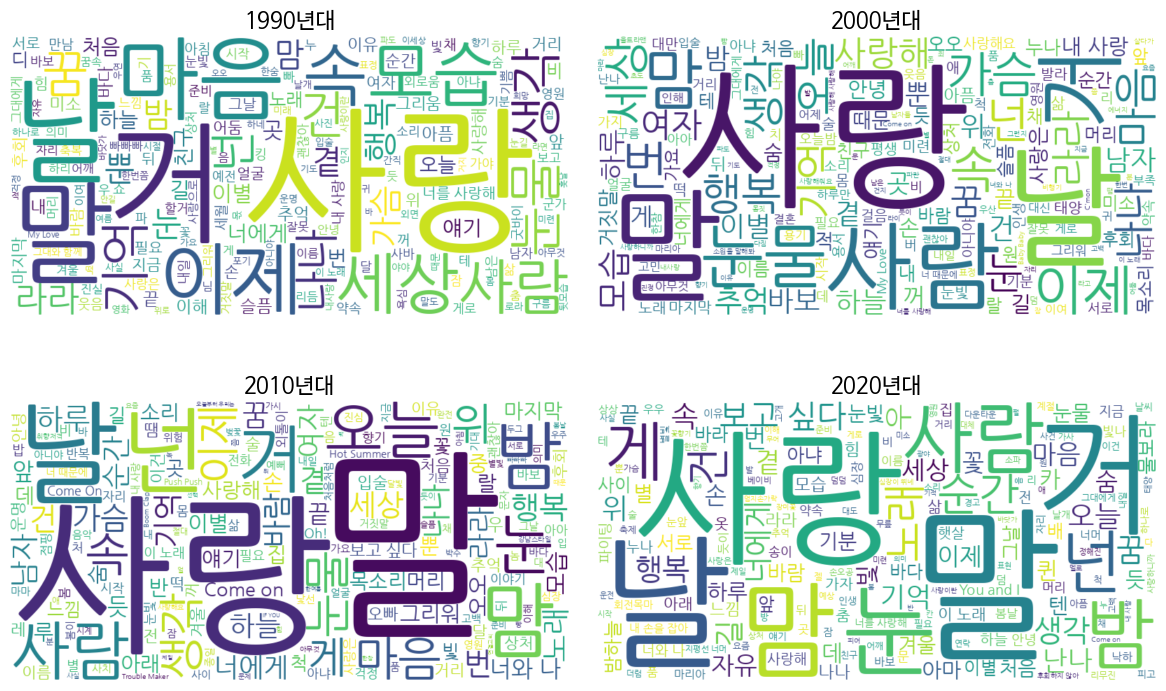

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from ast import literal_eval

# 데이터 로드
file_path = '/content/불용어_처리_데이터.csv'
data = pd.read_csv(file_path)

# 데이터 변환 함수
def convert_column_to_dict(data, columns_prefix):
    """주어진 연대별 열에서 단어와 빈도를 추출하여 딕셔너리로 변환"""
    freq_dict = {}
    for col in data.columns:
        if columns_prefix in col:  # 특정 연대의 열만 처리
            for item in data[col].dropna():
                try:
                    word, count = literal_eval(item)  # 문자열을 튜플로 변환
                    freq_dict[word] = freq_dict.get(word, 0) + count  # 빈도 합산
                except Exception as e:
                    continue
    return freq_dict

# 연대별 데이터 추출
freq_1990s = convert_column_to_dict(data, "1990s")
freq_2000s = convert_column_to_dict(data, "2000s")
freq_2010s = convert_column_to_dict(data, "2010s")
freq_2020s = convert_column_to_dict(data, "2020s")

# 워드클라우드 생성 및 저장 함수
def plot_and_save_wordcloud(freq, title, file_name):
    wordcloud = WordCloud(
        background_color="white",
        font_path="/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
        width=800,
        height=400
    ).generate_from_frequencies(freq)

    # 워드클라우드 저장
    wordcloud.to_file(file_name)
    print(f"{title} 워드클라우드가 {file_name}에 저장되었습니다.")

    # 워드클라우드 시각화
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)

# 워드클라우드 시각화 및 저장 실행
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plot_and_save_wordcloud(freq_1990s, "1990년대", "wordcloud_1990s.png")

plt.subplot(2, 2, 2)
plot_and_save_wordcloud(freq_2000s, "2000년대", "wordcloud_2000s.png")

plt.subplot(2, 2, 3)
plot_and_save_wordcloud(freq_2010s, "2010년대", "wordcloud_2010s.png")

plt.subplot(2, 2, 4)
plot_and_save_wordcloud(freq_2020s, "2020년대", "wordcloud_2020s.png")

plt.tight_layout()
plt.show()


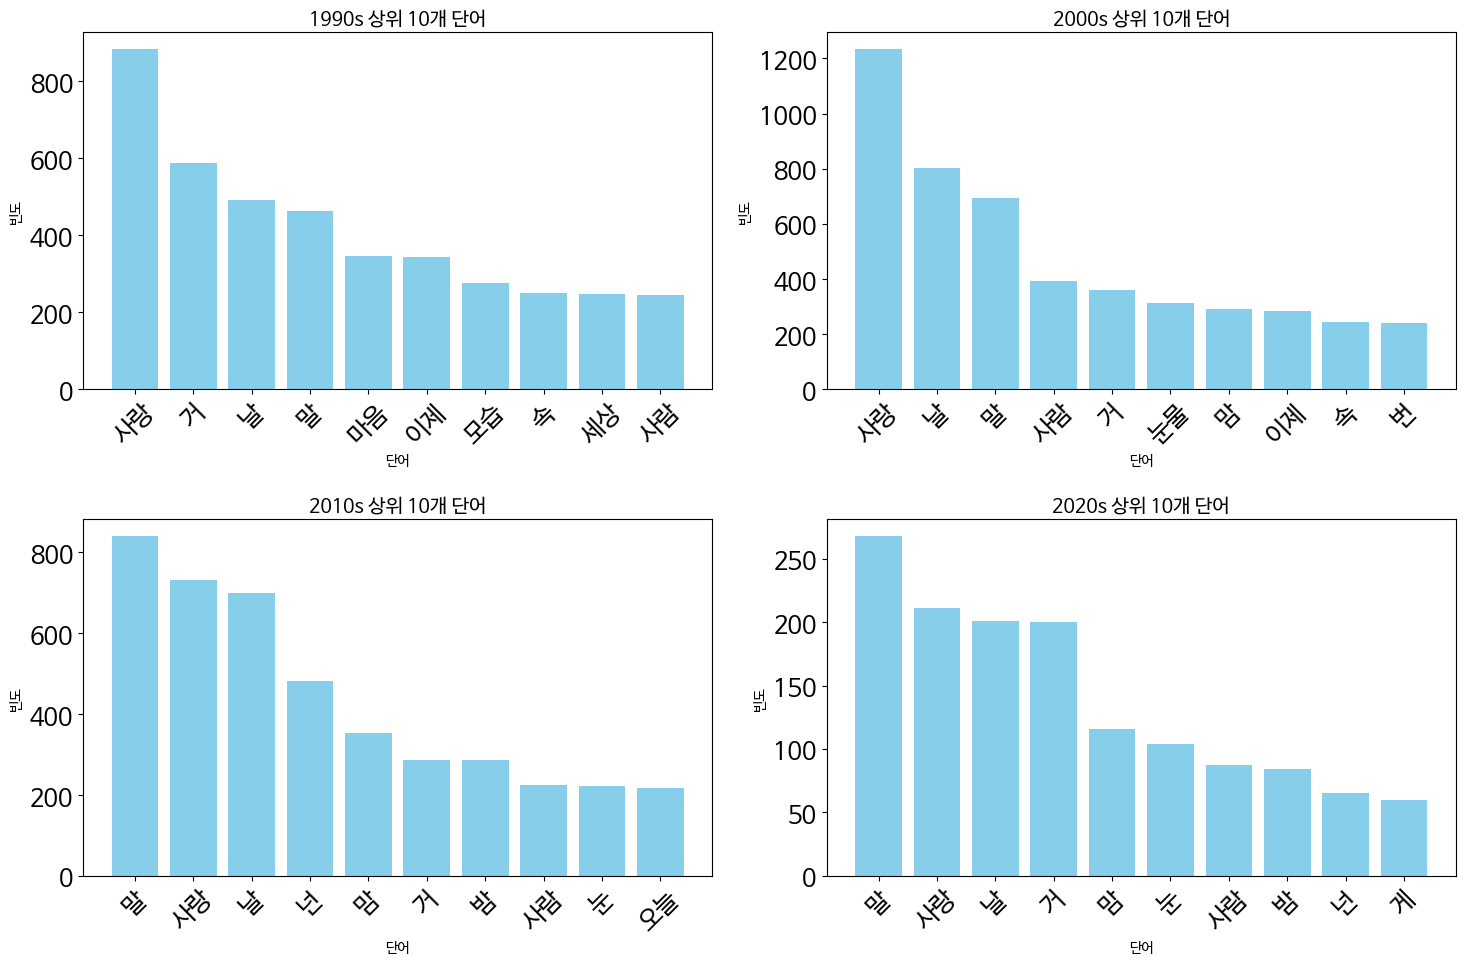

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 데이터 로드
file_path = '/content/frequency.csv'
data = pd.read_csv(file_path)

# 데이터 전처리 함수
def process_column(column):
    return column.str.extract(r"\('([^']*)',\s*(\d+)\)").dropna()

# 특정 연대의 상위 단어 추출 및 시각화 함수
def visualize_decade_words(decade, ax):
    columns = [col for col in data.columns if decade in col]
    processed_data = pd.concat([
        process_column(data[col]).rename(columns={0: 'word', 1: 'frequency'})
        for col in columns
    ])
    processed_data['frequency'] = processed_data['frequency'].astype(int)
    word_frequencies = processed_data.groupby('word')['frequency'].sum().reset_index()
    top_words = word_frequencies.nlargest(10, 'frequency')

    # 그래프 생성
    ax.bar(top_words['word'], top_words['frequency'], color='skyblue')
    ax.set_title(f"{decade} 상위 10개 단어", fontsize=14)
    ax.set_xlabel("단어", fontsize=10)
    ax.set_ylabel("빈도", fontsize=10)
    ax.tick_params(axis='x', rotation=45)

# 4개의 막대 그래프를 생성
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
decades = ['1990s', '2000s', '2010s', '2020s']

for ax, decade in zip(axes.flat, decades):
    visualize_decade_words(decade, ax)

# 레이아웃 조정
plt.tight_layout()

# 그래프를 파일로 저장
plt.savefig("decade_word_frequencies.png", dpi=300, bbox_inches='tight')  # 그래프 저장
plt.show()


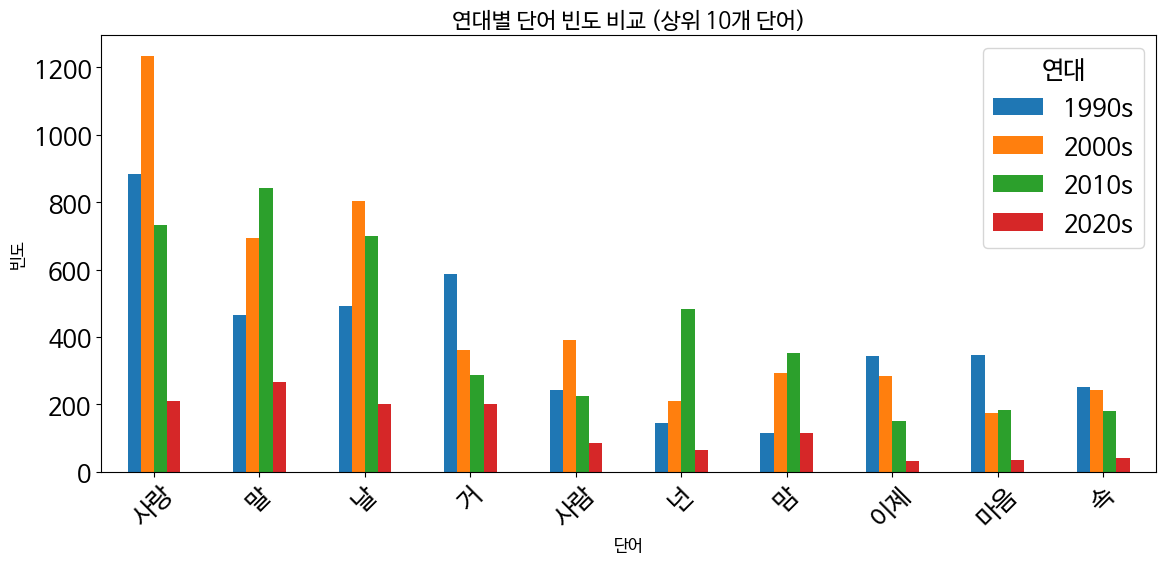

In [9]:
# Colab 환경에서 파일 읽기
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval

# CSV 파일 읽기
file_path = '/content/frequency.csv'
data = pd.read_csv(file_path)

# 데이터 변환 함수
def convert_column_to_dict(data, columns_prefix):
    """주어진 연대별 열에서 단어와 빈도를 추출하여 딕셔너리로 변환"""
    freq_dict = {}
    for col in data.columns:
        if columns_prefix in col:  # 특정 연대의 열만 처리
            for item in data[col].dropna():
                try:
                    word, count = literal_eval(item)  # 문자열을 튜플로 변환
                    freq_dict[word] = freq_dict.get(word, 0) + count  # 빈도 합산
                except Exception:
                    continue
    return freq_dict

# 연대별 데이터 추출
freq_1990s = convert_column_to_dict(data, "1990s")
freq_2000s = convert_column_to_dict(data, "2000s")
freq_2010s = convert_column_to_dict(data, "2010s")
freq_2020s = convert_column_to_dict(data, "2020s")

# 데이터프레임 생성 (시각화를 위해 정리)
freq_df = pd.DataFrame({
    "1990s": pd.Series(freq_1990s),
    "2000s": pd.Series(freq_2000s),
    "2010s": pd.Series(freq_2010s),
    "2020s": pd.Series(freq_2020s)
}).fillna(0).astype(int)

# 상위 10개 단어만 선택
top_words = freq_df.sum(axis=1).sort_values(ascending=False).head(10).index
freq_top_df = freq_df.loc[top_words]

# 막대그래프 시각화
freq_top_df.plot(kind="bar", figsize=(12, 6))
plt.title("연대별 단어 빈도 비교 (상위 10개 단어)", fontsize=16)
plt.ylabel("빈도", fontsize=12)
plt.xlabel("단어", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="연대")
plt.tight_layout()

# 그래프 저장
plt.savefig("frequency.png", dpi=300, bbox_inches='tight')  # 그래프 저장
plt.show()


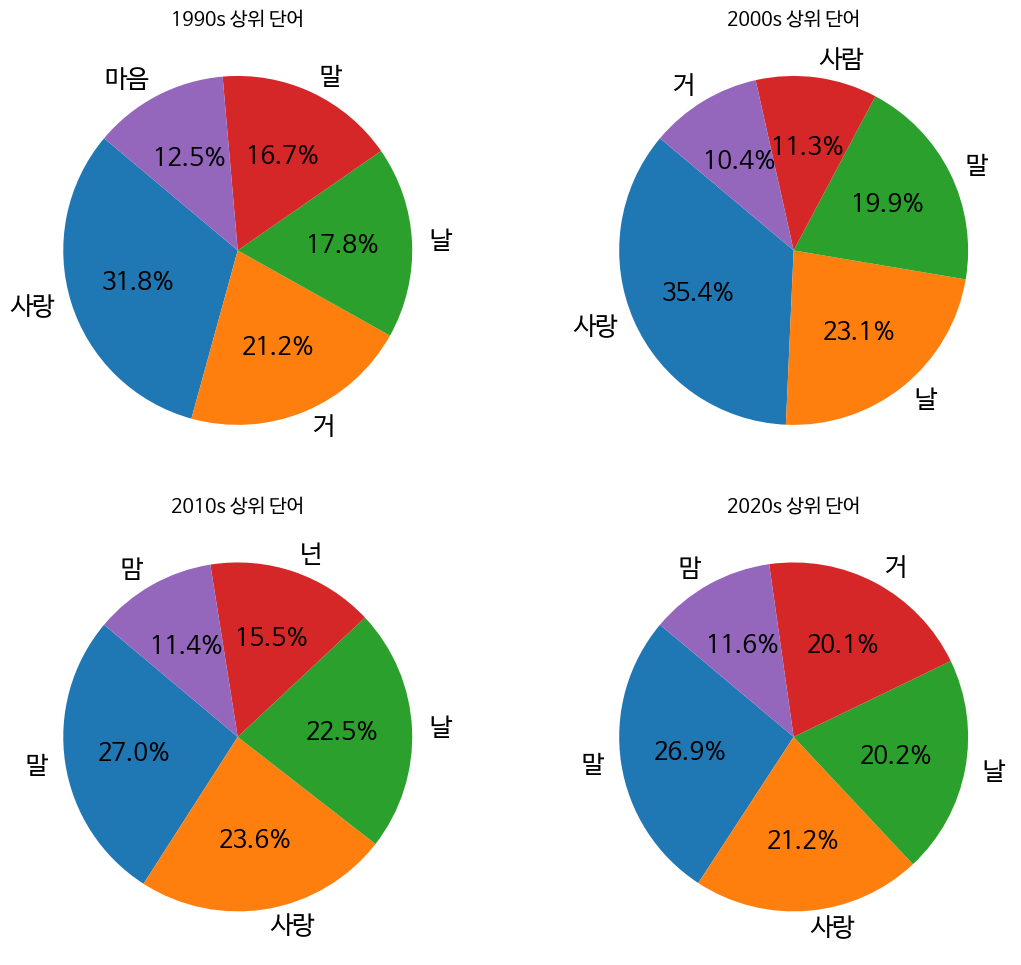

In [12]:
import matplotlib.pyplot as plt

# 연대별 상위 N개 단어 추출 함수
def get_top_n_words(freq_dict, n=5):
    sorted_items = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)
    return dict(sorted_items[:n])

# 연대별 상위 N개 단어 추출
top_n = 5  # 상위 N개 단어
top_1990s = get_top_n_words(freq_1990s, n=top_n)
top_2000s = get_top_n_words(freq_2000s, n=top_n)
top_2010s = get_top_n_words(freq_2010s, n=top_n)
top_2020s = get_top_n_words(freq_2020s, n=top_n)

# 파이 차트 시각화 함수
def visualize_pie_chart(data, title, ax):
    ax.pie(data.values(), labels=data.keys(), autopct='%1.1f%%', startangle=140)
    ax.set_title(title, fontsize=14)

# 파이 차트 그리기
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
visualize_pie_chart(top_1990s, "1990s 상위 단어", axes[0, 0])
visualize_pie_chart(top_2000s, "2000s 상위 단어", axes[0, 1])
visualize_pie_chart(top_2010s, "2010s 상위 단어", axes[1, 0])
visualize_pie_chart(top_2020s, "2020s 상위 단어", axes[1, 1])

plt.tight_layout()

# 전체 차트를 파일로 저장
plt.savefig("decade_top_words_pie_chart.png", dpi=300, bbox_inches='tight')  # 파일 저장
plt.show()


정확도(Accuracy): 0.997215777262181
분류 리포트(Classification Report):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2145
           1       1.00      0.40      0.57        10

    accuracy                           1.00      2155
   macro avg       1.00      0.70      0.79      2155
weighted avg       1.00      1.00      1.00      2155



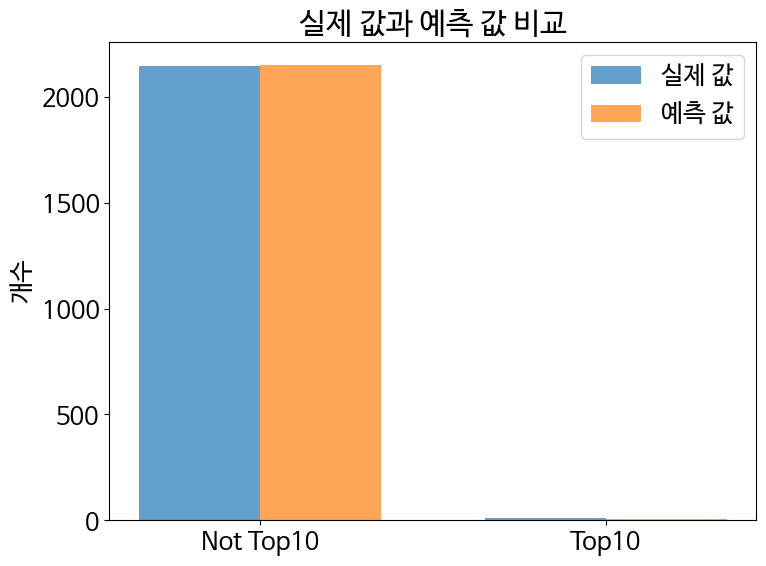

In [22]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from ast import literal_eval
import numpy as np

# 데이터 로드
data_path = '/content/frequency.csv'
data = pd.read_csv(data_path)

# 특정 열에서 단어와 빈도를 추출하여 딕셔너리로 변환하는 함수
def extract_word_frequencies(data, decade_prefix):
    freq_dict = {}
    for col in data.columns:
        if col.startswith(decade_prefix):
            for item in data[col].dropna():
                try:
                    word, count = literal_eval(item)  # 문자열을 튜플로 변환
                    freq_dict[word] = freq_dict.get(word, 0) + count  # 빈도 합산
                except Exception:
                    continue
    return freq_dict

# 연대별 데이터 추출
freq_1990s = extract_word_frequencies(data, "1990s")
freq_2000s = extract_word_frequencies(data, "2000s")
freq_2010s = extract_word_frequencies(data, "2010s")
freq_2020s = extract_word_frequencies(data, "2020s")

# 데이터프레임으로 변환
freq_data = pd.DataFrame({
    "1990s": pd.Series(freq_1990s),
    "2000s": pd.Series(freq_2000s),
    "2010s": pd.Series(freq_2010s),
    "2020s": pd.Series(freq_2020s)
}).fillna(0).astype(int)

# 라벨 생성: 각 연대별 상위 10개의 단어를 라벨 1로 설정
for col in freq_data.columns:
    freq_data[f"{col}_label"] = 0
    top_10_indices = freq_data[col].nlargest(10).index
    freq_data.loc[top_10_indices, f"{col}_label"] = 1

# 특성과 라벨 준비
feature_columns = ["1990s", "2000s", "2010s", "2020s"]
label_columns = ["1990s_label", "2000s_label", "2010s_label", "2020s_label"]

# 학습 데이터와 테스트 데이터 준비
X_train = freq_data[["1990s", "2000s", "2010s"]].values
y_train = freq_data[["1990s_label", "2000s_label", "2010s_label"]].max(axis=1).values

X_test = freq_data[["2020s", "2020s", "2020s"]].values  # 테스트 데이터를 학습 데이터와 동일하게 확장
y_test = freq_data["2020s_label"].values

# 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = rf_model.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"정확도(Accuracy): {accuracy}")
print(f"분류 리포트(Classification Report):\n{classification_rep}")

# 시각화: 실제 라벨 vs 예측 라벨
labels = ["Not Top10", "Top10"]
y_test_counts = np.bincount(y_test, minlength=2)
y_pred_counts = np.bincount(y_pred, minlength=2)

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x - width/2, y_test_counts, width, label='실제 값', alpha=0.7)
ax.bar(x + width/2, y_pred_counts, width, label='예측 값', alpha=0.7)

ax.set_ylabel('개수')
ax.set_title('실제 값과 예측 값 비교')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()


정확도(Accuracy): 0.494199535962877
분류 리포트(Classification Report):
              precision    recall  f1-score   support

           0       0.50      0.88      0.63      1075
           1       0.48      0.11      0.18      1080

    accuracy                           0.49      2155
   macro avg       0.49      0.50      0.41      2155
weighted avg       0.49      0.49      0.41      2155



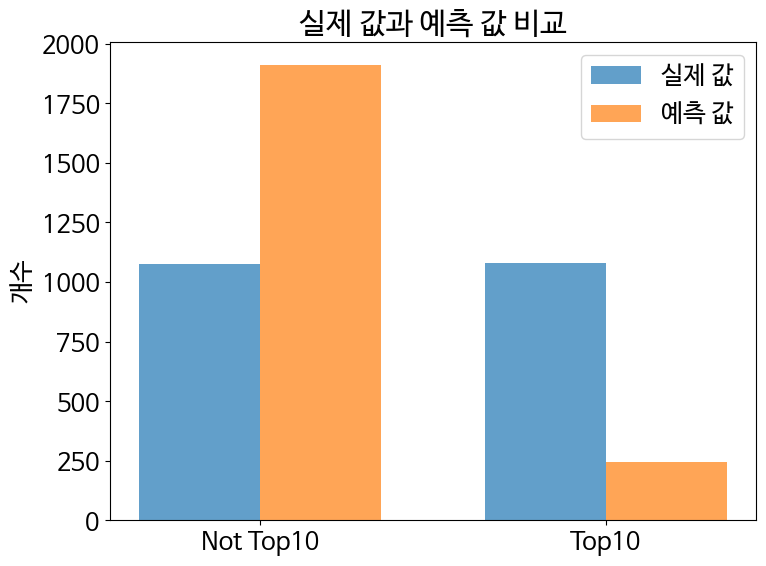

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# 라벨 준비
# 예시용 가상의 라벨 데이터 생성
# 실제 데이터에서는 적절한 라벨 컬럼을 사용해야 합니다.
y_train = np.random.choice([0, 1], size=len(X_train))  # 1990s, 2000s, 2010s 라벨
y_test = np.random.choice([0, 1], size=len(X_test))    # 2020s 라벨

# 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = rf_model.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# 결과 출력
print(f"정확도(Accuracy): {accuracy}")
print(f"분류 리포트(Classification Report):\n{classification_rep}")

# 실제 vs 예측 라벨 시각화
import matplotlib.pyplot as plt

labels = ["Not Top10", "Top10"]
y_test_counts = np.bincount(y_test, minlength=2)
y_pred_counts = np.bincount(y_pred, minlength=2)

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x - width/2, y_test_counts, width, label='실제 값', alpha=0.7)
ax.bar(x + width/2, y_pred_counts, width, label='예측 값', alpha=0.7)

ax.set_ylabel('개수')
ax.set_title('실제 값과 예측 값 비교')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
import numpy as np

# StratifiedKFold 설정
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2020)

# 학습 및 테스트 데이터 분리
X_train2, X_dev, y_train2, y_dev = train_test_split(
    X_train, y_train, test_size=0.3, random_state=2020, shuffle=True, stratify=y_train
)

# 모델 정의
models = {
    "RandomForest": RandomForestClassifier(random_state=2020),
    "LogisticRegression": LogisticRegression(random_state=2020, n_jobs=-1),
    "KNN": KNeighborsClassifier(n_jobs=-1),
    "ExtraTrees": ExtraTreesClassifier(random_state=2020, n_jobs=-1),
}

# 모델 학습 및 교차 검증
results = {}

print("#### 모델들의 ROC-AUC 교차 검증 결과 ####")
for model_name, model in models.items():
    # 교차 검증
    cv_scores = cross_val_score(model, X_dev, y_dev, cv=skf, scoring="roc_auc")
    results[model_name] = {
        "scores": cv_scores,
        "mean_score": np.mean(cv_scores),
    }
    # 결과 출력
    print(f"{model_name} : {cv_scores}")
    print(f"{model_name} 평균 : {np.mean(cv_scores)}")

# 최종 결과 저장
results


#### 모델들의 ROC-AUC 교차 검증 결과 ####
RandomForest : [0.48795181 0.53583956 0.47735245 0.57865082]
RandomForest 평균 : 0.5199486584807894
LogisticRegression : [0.43602257 0.54438005 0.41833155 0.46711948]
LogisticRegression 평균 : 0.4664634146341463
KNN : [0.50404148 0.52447766 0.51913985 0.56969744]
KNN 평균 : 0.5293391069681628
ExtraTrees : [0.47231966 0.55238676 0.47346347 0.59169497]
ExtraTrees 평균 : 0.5224662155878841


{'RandomForest': {'scores': array([0.48795181, 0.53583956, 0.47735245, 0.57865082]),
  'mean_score': 0.5199486584807894},
 'LogisticRegression': {'scores': array([0.43602257, 0.54438005, 0.41833155, 0.46711948]),
  'mean_score': 0.4664634146341463},
 'KNN': {'scores': array([0.50404148, 0.52447766, 0.51913985, 0.56969744]),
  'mean_score': 0.5293391069681628},
 'ExtraTrees': {'scores': array([0.47231966, 0.55238676, 0.47346347, 0.59169497]),
  'mean_score': 0.5224662155878841}}